![alt text](image.png)


## Exploratory Data Analysis on Titanic Dataset

This code is my take on the Task 2 of the Elevvo Pathways Data Analyst Internship program. 
In this notebook, I shall process data from the dataset titanictrain.csv from the Kaggle Titanic: Machine Learning from Disaster dataset. 

Table of Contents: 
1. Importing all the libraries
2. Reading dataset

1. Importing all the libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

2. Reading dataset

In [6]:
df = pd.read_csv('titanictrain.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


When analyzing the data above, some of the data seems to be missing. The next steps as follows will now clean the dataset. 

3. Cleaning dataset

In [7]:
#Checking for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df[df['Age'].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
df[df['Cabin'].isna()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:

df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We notice that there are 2 missing entries for Embarked passengers. Cabin has a majority of missing entries, as a result we drop this column. Meanwhile, Age also has a significant amount of entries missing. 

To remedy this, we shall take the most frequent value (mode) and use it for the missing entries. For the Age column, we can fill it with median ages. 
In order to retain some useful information from Cabin, HasCabin has been created which will tell if a passenger had a cabin assigned.


In [13]:

df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
df.drop('Cabin', axis=1, inplace=True)


df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64

After running isna() again, all the missing values have been cleaned from the dataset. The next step would be to fix the invalid datatypes which are shown as follows. 

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
HasCabin         int64
dtype: object

Looking at the datatypes, we notice that:

- Survived needs to be a Boolean datatype.
- Age should be of int datatype.
- Pclass and Embarked should be categorical.


In [18]:
df['Survived'] = df['Survived'].astype(bool)                  
df['Age'] = df['Age'].astype(int)                                
df[['Pclass', 'Embarked']] = df[['Pclass', 'Embarked']].astype('category') 


In [19]:
df.dtypes

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex              object
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
HasCabin          int64
dtype: object

After going through the datatypes, each column is now using an appropriate data type.


## Generating Summary Statistics and Group-Based Insights

In this section, we will make summary statistics and graphs on survival. The survival by different categories are as follows: 
- by gender
- by passenger class 
- by which port they embarked


Text(0.5, 1.0, 'Survival by Gender')

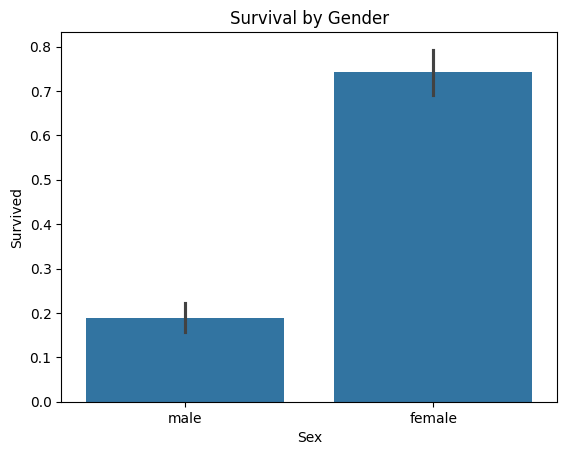

In [20]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival by Gender')

From the chart, we can see that female passengers had a higher chance of survival compared to male passengers.

Text(0, 0.5, 'Average Survival Rate')

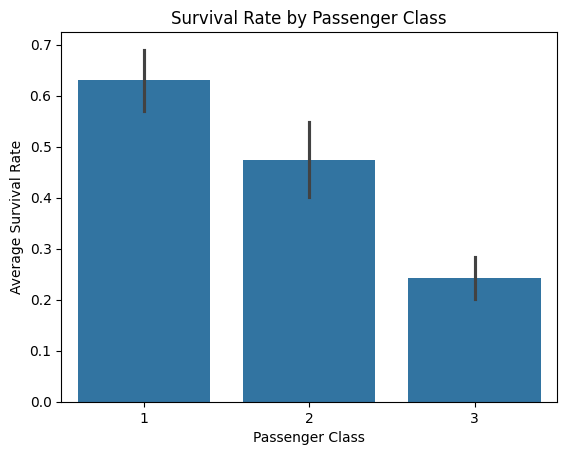

In [22]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Survival Rate')

The bar chart shows the survival rate for each passenger class. It is clear that passengers in higher classes had a better chance of survival compared to those in lower classes. We can also infer the fact that higher class passengers were given more priority to escape.

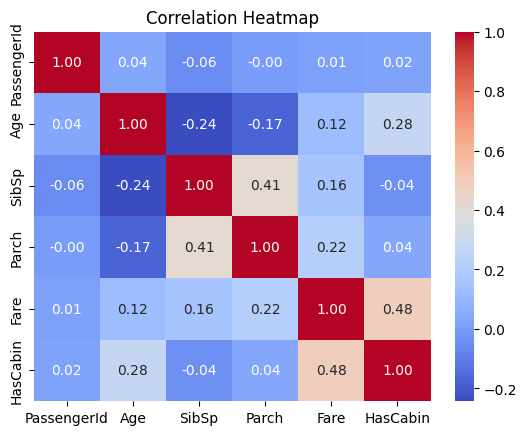

In [24]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows the correlation between numeric variables in the dataset. Positive correlations are shown in red and negative correlations in blue. For example, we can see that Fare has a small positive correlation with Survived, indicating that passengers who paid higher fares were slightly more likely to survive.

In conclusion, the analysis of the Titanic dataset shows some clear patterns. Female passengers had a better chance of survival than male passengers, and those in higher classes were more likely to survive. Younger passengers and those who paid higher fares also had slightly better survival rates. Overall, these findings give us a better understanding of the factors that influenced survival on the Titanic.
